In [1]:
# Import the API key for FMP
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
fmp_key = os.getenv("FMP_Key")

In [2]:
from urllib.request import urlopen
import json

In [3]:
url = ("https://financialmodelingprep.com/api/v3/quote/CAT?apikey=")

cat_prices_url = url + fmp_key
print(cat_prices_url)

https://financialmodelingprep.com/api/v3/quote/CAT?apikey=30f38fe4adae4904fc1497cf7bea1fca


In [4]:
def get_jsonparsed_data(url):
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [5]:
# Initial imports
import numpy as np
import pandas as pd

%matplotlib inline

In [6]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [7]:
cat_data = get_jsonparsed_data(cat_prices_url)

In [8]:
from pprint import pprint
pprint(cat_data)

[{'avgVolume': 3462014,
  'change': -3.03,
  'changesPercentage': -1.38,
  'dayHigh': 221.57,
  'dayLow': 215.28,
  'earningsAnnouncement': '2021-04-29T06:30:00.000+0000',
  'eps': 6.254,
  'exchange': 'NYSE',
  'marketCap': 118491807744.0,
  'name': 'Caterpillar Inc.',
  'open': 221.18,
  'pe': 34.587463,
  'previousClose': 219.34,
  'price': 216.31,
  'priceAvg200': 214.33124,
  'priceAvg50': 231.91342,
  'sharesOutstanding': 547787008,
  'symbol': 'CAT',
  'timestamp': 1624732964,
  'volume': 11263933,
  'yearHigh': 246.69,
  'yearLow': 123.28}]


In [9]:
cat_df = pd.DataFrame(cat_data).set_index("symbol")
cat_df.head()

,name,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,marketCap,priceAvg50,...,volume,avgVolume,exchange,open,previousClose,eps,pe,earningsAnnouncement,sharesOutstanding,timestamp
symbol,,,,,,,,,,,,,,,,,,,,,
CAT,Caterpillar Inc.,216.31,-1.38,-3.03,215.28,221.57,246.69,123.28,1.184918e+11,231.91342,...,11263933,3462014,NYSE,221.18,219.34,6.254,34.587463,2021-04-29T06:30:00.000+0000,547787008,1624732964


In [10]:
cat_df = cat_df.drop(['name', 'marketCap','volume','avgVolume','exchange','eps','pe','earningsAnnouncement','sharesOutstanding','timestamp'],axis=1)
cat_df.head()

,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,priceAvg50,priceAvg200,open,previousClose
symbol,,,,,,,,,,,
CAT,216.31,-1.38,-3.03,215.28,221.57,246.69,123.28,231.91342,214.33124,221.18,219.34


In [11]:
url2 = ("https://financialmodelingprep.com/api/v3/quote/DE?apikey=")

de_prices_url = url2+ fmp_key
print(de_prices_url)

https://financialmodelingprep.com/api/v3/quote/DE?apikey=30f38fe4adae4904fc1497cf7bea1fca


In [12]:
url3 = ("https://financialmodelingprep.com/api/v3/quote/HON?apikey=")

hon_prices_url = url3+ fmp_key
print(hon_prices_url)

https://financialmodelingprep.com/api/v3/quote/HON?apikey=30f38fe4adae4904fc1497cf7bea1fca


In [13]:
de_data = get_jsonparsed_data(de_prices_url)
hon_data = get_jsonparsed_data(hon_prices_url)

In [14]:
de_df = pd.DataFrame(de_data).set_index("symbol").drop(['name', 'marketCap','volume','avgVolume','exchange','eps','pe','earningsAnnouncement','sharesOutstanding','timestamp'],axis=1)
de_df.head()


,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,priceAvg50,priceAvg200,open,previousClose
symbol,,,,,,,,,,,
DE,349.99,-0.18,-0.63,347.83,355.8568,400.34,150.32,357.41714,336.47797,354.09,350.62


In [15]:
hon_df = pd.DataFrame(hon_data).set_index("symbol").drop(['name', 'marketCap','volume','avgVolume','exchange','eps','pe','earningsAnnouncement','sharesOutstanding','timestamp'],axis=1)
hon_df.head()

,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,priceAvg50,priceAvg200,open,previousClose
symbol,,,,,,,,,,,
HON,218.74,0.48,1.05,217.49,220.17,234.02,139.28,224.20314,215.24747,217.87,217.69


In [16]:
machinery_df = pd.concat([cat_df, de_df, hon_df])
machinery_df.head()

,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,priceAvg50,priceAvg200,open,previousClose
symbol,,,,,,,,,,,
CAT,216.31,-1.38,-3.03,215.28,221.5700,246.69,123.28,231.91342,214.33124,221.18,219.34
DE,349.99,-0.18,-0.63,347.83,355.8568,400.34,150.32,357.41714,336.47797,354.09,350.62
HON,218.74,0.48,1.05,217.49,220.1700,234.02,139.28,224.20314,215.24747,217.87,217.69


In [17]:
machinery_df.transpose()

symbol,CAT,DE,HON
price,216.31000,349.99000,218.74000
changesPercentage,-1.38000,-0.18000,0.48000
change,-3.03000,-0.63000,1.05000
dayLow,215.28000,347.83000,217.49000
dayHigh,221.57000,355.85680,220.17000
yearHigh,246.69000,400.34000,234.02000
yearLow,123.28000,150.32000,139.28000
priceAvg50,231.91342,357.41714,224.20314
priceAvg200,214.33124,336.47797,215.24747
open,221.18000,354.09000,217.87000


In [18]:
import requests
cat_csv = "https://www.quandl.com/api/v3/datasets/WIKI/CAT/data.csv?api_key="
quandl_key = os.getenv("QUANDL_KEY")
cat_quandl_url = cat_csv + quandl_key

In [19]:
DE_csv = "https://www.quandl.com/api/v3/datasets/WIKI/DE/data.csv?api_key="
quandl_key = os.getenv("QUANDL_KEY")
DE_quandl_url = DE_csv + quandl_key
print(DE_quandl_url)

https://www.quandl.com/api/v3/datasets/WIKI/DE/data.csv?api_key=nekR9_uw9Q2mb3_qqfLx


In [20]:
HON_csv = "https://www.quandl.com/api/v3/datasets/WIKI/HON/data.csv?api_key="
quandl_key = os.getenv("QUANDL_KEY")
HON_quandl_url = HON_csv + quandl_key
print(HON_quandl_url)

https://www.quandl.com/api/v3/datasets/WIKI/HON/data.csv?api_key=nekR9_uw9Q2mb3_qqfLx


In [21]:
print(cat_quandl_url)

https://www.quandl.com/api/v3/datasets/WIKI/CAT/data.csv?api_key=nekR9_uw9Q2mb3_qqfLx


In [22]:
from pathlib import Path
csvpath_cat = Path('cat_historical.csv')
cat_historical = pd.read_csv(csvpath_cat, parse_dates=True, index_col='Date')
cat_historical

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,149.90,151.12,145.79,146.99,4860757.0,0.0,1.0,149.900000,151.120000,145.790000,146.990000,4860757.0
2018-03-26,147.82,149.56,145.26,149.19,5394479.0,0.0,1.0,147.820000,149.560000,145.260000,149.190000,5394479.0
2018-03-23,147.70,148.95,143.79,144.29,6452195.0,0.0,1.0,147.700000,148.950000,143.790000,144.290000,6452195.0
2018-03-22,152.87,153.50,146.25,146.90,7975803.0,0.0,1.0,152.870000,153.500000,146.250000,146.900000,7975803.0
2018-03-21,154.16,157.28,153.21,155.80,3856508.0,0.0,1.0,154.160000,157.280000,153.210000,155.800000,3856508.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1962-01-08,40.25,40.87,40.00,40.50,16933.0,0.0,1.0,1.650114,1.675532,1.639865,1.660363,203196.0
1962-01-05,39.88,40.75,39.75,40.25,13600.0,0.0,1.0,1.634945,1.670612,1.629616,1.650114,163200.0
1962-01-04,39.75,41.00,39.75,39.88,29600.0,0.0,1.0,1.629616,1.680862,1.629616,1.634945,355200.0


In [23]:
csvpath_de = Path('de_historical.csv')
de_historical = pd.read_csv(csvpath_de, parse_dates=True, index_col='Date')
de_historical

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,154.24,156.99,150.90,152.16,2665278.0,0.0,1.0,154.240000,156.990000,150.900000,152.160000,2665278.0
2018-03-26,151.39,153.68,148.90,153.34,2449053.0,0.0,1.0,151.390000,153.680000,148.900000,153.340000,2449053.0
2018-03-23,151.76,153.73,147.60,148.00,2923419.0,0.0,1.0,151.760000,153.730000,147.600000,148.000000,2923419.0
2018-03-22,153.74,156.37,151.21,151.58,3647229.0,0.0,1.0,153.740000,156.370000,151.210000,151.580000,3647229.0
2018-03-21,158.89,160.44,155.73,158.05,2901138.0,0.0,1.0,158.890000,160.440000,155.730000,158.050000,2901138.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1972-06-07,64.25,64.25,63.75,63.88,24100.0,0.0,1.0,1.303562,1.303562,1.293417,1.296055,578400.0
1972-06-06,65.25,65.50,64.50,64.63,18700.0,0.0,1.0,1.323850,1.328923,1.308634,1.311271,448800.0
1972-06-05,65.38,65.38,64.50,65.25,10100.0,0.0,1.0,1.326488,1.326488,1.308634,1.323850,242400.0


In [24]:
csvpath_hon = Path('hon_historical.csv')
hon_historical = pd.read_csv(csvpath_hon, parse_dates=True, index_col='Date')
hon_historical

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,147.58,148.150,143.57,144.34,3060626.0,0.0,1.0,147.580000,148.150000,143.570000,144.340000,3060626.0
2018-03-26,145.46,147.325,144.33,146.94,2234737.0,0.0,1.0,145.460000,147.325000,144.330000,146.940000,2234737.0
2018-03-23,146.99,148.130,143.10,143.28,3520745.0,0.0,1.0,146.990000,148.130000,143.100000,143.280000,3520745.0
2018-03-22,149.60,150.280,146.40,146.88,2548766.0,0.0,1.0,149.600000,150.280000,146.400000,146.880000,2548766.0
2018-03-21,150.77,152.770,150.06,151.36,2586010.0,0.0,1.0,150.770000,152.770000,150.060000,151.360000,2586010.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-08,26.00,26.500,26.00,26.50,14100.0,0.0,1.0,3.015886,3.073884,3.015886,3.073884,56400.0
1970-01-07,26.00,26.370,25.88,25.88,16200.0,0.0,1.0,3.015886,3.058805,3.001967,3.001967,64800.0
1970-01-06,26.00,26.500,25.75,26.00,22200.0,0.0,1.0,3.015886,3.073884,2.986887,3.015886,88800.0


In [25]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [26]:
import numpy as np

In [27]:
cat_quandl_json = "https://www.quandl.com/api/v3/datasets/WIKI/CAT/data.json?api_key="
cat_response_data = cat_quandl_json + quandl_key
print(cat_response_data)

https://www.quandl.com/api/v3/datasets/WIKI/CAT/data.json?api_key=nekR9_uw9Q2mb3_qqfLx


In [28]:
import requests
cat_requests = requests.get(cat_response_data).json()
cat_quandl_prices = cat_requests["dataset_data"]["data"]
#cat_quandl_prices

In [29]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [30]:
cat_historical.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,149.90,151.12,145.79,146.99,4860757.0,0.0,1.0,149.90,151.12,145.79,146.99,4860757.0
2018-03-26,147.82,149.56,145.26,149.19,5394479.0,0.0,1.0,147.82,149.56,145.26,149.19,5394479.0
2018-03-23,147.70,148.95,143.79,144.29,6452195.0,0.0,1.0,147.70,148.95,143.79,144.29,6452195.0
2018-03-22,152.87,153.50,146.25,146.90,7975803.0,0.0,1.0,152.87,153.50,146.25,146.90,7975803.0
2018-03-21,154.16,157.28,153.21,155.80,3856508.0,0.0,1.0,154.16,157.28,153.21,155.80,3856508.0


In [31]:
# Define the window size
window_size = 100

# Set the index of the feature and target columns
feature_column = 3
target_column = 3

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(cat_historical, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[146.99 149.19 144.29 146.9  155.8  154.06 152.15 156.46 154.57 152.54
  153.69 154.5  158.25 153.59 151.51 153.75 151.12 146.38 150.23 154.63
  161.26 163.69 162.41 158.86 155.23 155.56 156.29 159.98 158.06 153.97
  152.29 149.21 145.99 154.34 156.41 151.08 157.49 162.24 162.78 163.76
  162.58 167.06 169.37 168.34 169.43 170.89 170.41 168.83 168.5  169.31
  170.3  169.2  165.87 166.43 166.03 161.96 159.44 157.28 157.04 157.58
  158.42 157.52 156.44 155.75 154.64 152.52 150.91 149.77 146.69 146.28
  148.57 143.42 143.77 143.86 142.89 140.34 140.14 141.5  141.52 141.15
  138.06 138.99 137.19 137.39 138.01 137.6  136.91 136.13 136.36 134.1
  137.54 136.53 136.48 135.34 138.81 137.71 136.63 136.47 136.29 135.8 ]
 [149.19 144.29 146.9  155.8  154.06 152.15 156.46 154.57 152.54 153.69
  154.5  158.25 153.59 151.51 153.75 151.12 146.38 150.23 154.63 161.26
  163.69 162.41 158.86 155.23 155.56 156.29 159.98 158.06 153.97 152.29
  149.21 145.99 154.34 156.41 151.08 157.49 162

In [32]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [33]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [34]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.83929532]
  [0.85408822]
  [0.8211404 ]
  [0.83869016]
  [0.89853416]
  [0.88683432]
  [0.87399139]
  [0.90297203]
  [0.89026358]
  [0.87661377]
  [0.88434642]
  [0.8897929 ]
  [0.91500807]
  [0.88367402]
  [0.869688  ]
  [0.88474987]
  [0.86706563]
  [0.83519365]
  [0.86108123]
  [0.89066703]
  [0.93524744]
  [0.95158687]
  [0.9429801 ]
  [0.91910974]
  [0.89470145]
  [0.89692039]
  [0.90182894]
  [0.92664067]
  [0.9137305 ]
  [0.88622916]
  [0.87493276]
  [0.8542227 ]
  [0.83257127]
  [0.88871705]
  [0.90263583]
  [0.86679666]
  [0.90989779]
  [0.94183701]
  [0.94546799]
  [0.95205756]
  [0.94412318]
  [0.97424691]
  [0.98977945]
  [0.98285368]
  [0.99018289]
  [1.        ]
  [1.        ]
  [0.99007628]
  [0.98784851]
  [0.99331668]
  [1.        ]
  [1.        ]
  [0.99611812]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [0.99163303]
  [0.98987156]
  [0.99383486]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  [1.        ]
  

In [35]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [36]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = window_size
# 20% of neurons to be dropped out
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [37]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [38]:
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=100, verbose=1)

Epoch 1/20
99/99 [==============================] - 7s 72ms/step - loss: 0.0611
Epoch 2/20
99/99 [==============================] - 7s 72ms/step - loss: 0.0042
Epoch 3/20
99/99 [==============================] - 7s 72ms/step - loss: 0.0029
Epoch 4/20
99/99 [==============================] - 7s 72ms/step - loss: 0.0027
Epoch 5/20
99/99 [==============================] - 7s 72ms/step - loss: 0.0028
Epoch 6/20
99/99 [==============================] - 7s 72ms/step - loss: 0.0027
Epoch 7/20
99/99 [==============================] - 7s 73ms/step - loss: 0.0029
Epoch 8/20
99/99 [==============================] - 7s 73ms/step - loss: 0.0030
Epoch 9/20
99/99 [==============================] - 7s 72ms/step - loss: 0.0027
Epoch 10/20
99/99 [==============================] - 7s 73ms/step - loss: 0.0025
Epoch 11/20
99/99 [==============================] - 7s 72ms/step - loss: 0.0026
Epoch 12/20
99/99 [==============================] - 7s 73ms/step - loss: 0.0026
Epoch 13/20
99/99 [==================

In [39]:
model.evaluate(X_test, y_test, verbose=0)

0.0002882757689803839

In [40]:
predicted = model.predict(X_test)

In [45]:
# create new X_test variable to use to predict

In [41]:
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(predicted)

In [42]:
cat_actual_predicted = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = cat_historical.index[-len(real_prices): ]) 

# Show the DataFrame's head
cat_actual_predicted.head()

,Actual,Predicted
Date,,
1978-10-27,57.422989,57.422989
1978-10-26,57.068932,57.068932
1978-10-25,56.548424,56.548424
1978-10-24,56.074619,56.074619
1978-10-23,55.769146,55.769146


In [43]:
cat_actual_predicted.tail()

,Actual,Predicted
Date,,
1962-01-08,41.510422,41.510422
1962-01-05,41.447025,41.447025
1962-01-04,41.363224,41.363224
1962-01-03,41.244888,41.244888
1962-01-02,41.046021,41.046021


<AxesSubplot:title={'center':'Actual Vs. Predicted CAT Prices (1962 - 1978)'}, xlabel='Date'>

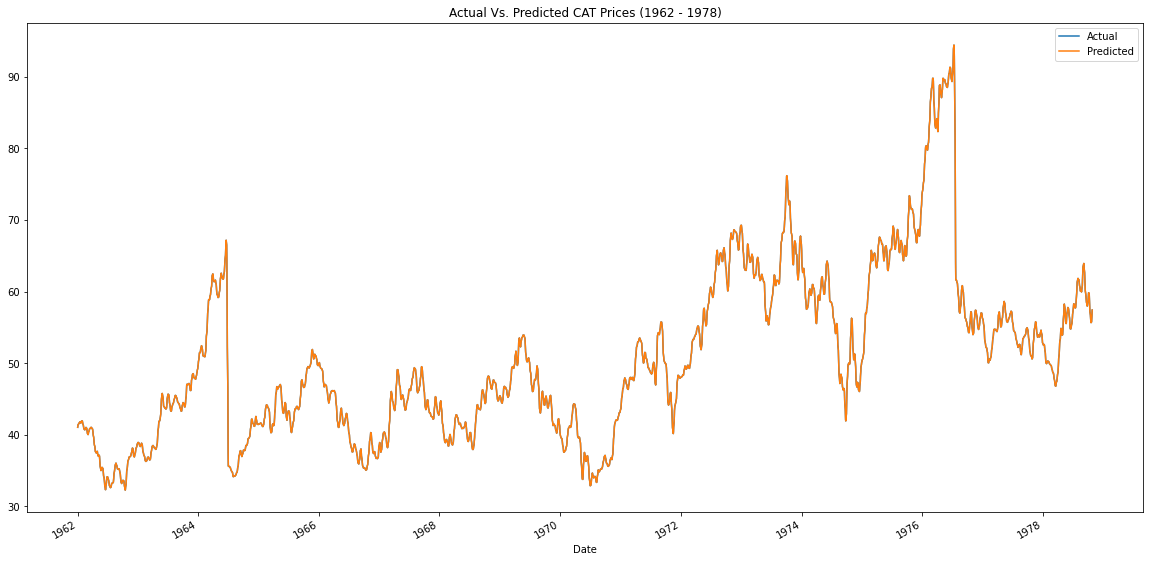

In [44]:
cat_actual_predicted.plot(title="Actual Vs. Predicted CAT Prices (1962 - 1978)", figsize=(20,10))